In [1]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from random import randrange, uniform
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from scipy import stats
import os
from collections import Counter

In [2]:
#Set working directory
os.chdir("E:\Edwisor\Project2\ProjectPython")

In [3]:
print(os.getcwd())

E:\Edwisor\Project2\ProjectPython


In [4]:
#Load data
df_cab_train = pd.read_csv("train_cab.csv")
df_cab_train.head()
df_cab_train.dtypes
df_cab_train.shape

(16067, 7)

In [5]:
#Load data
df_cab_test = pd.read_csv("test.csv")
df_cab_test.dtypes
df_cab_test.shape
df_cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
#EDA
#Check missing values
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df_cab_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df_cab_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("PercentageMissing.csv", index = False)

missing_cols= missing_val.columns


In [12]:
df_cab_test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [13]:
#passenger_count	0.342316549
#fare_amount	0.149374494
#df_cab_train.shape
#Since the missing value is very less, hence dropping these values

df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train.isnull().any(1)].index, axis = 0)


In [14]:
df_cab_train.shape

(15988, 7)

In [15]:
#Basic business assumptions:
#Fare amount should be a positive value
#pickup_datetime should be datetime type
df_cab_train.dtypes
df_cab_train['pickup_datetime'].describe()

count                       15988
unique                      15943
top       2013-06-06 19:47:00 UTC
freq                            2
Name: pickup_datetime, dtype: object

In [16]:
df_cab_train['pickup_datetime']  = df_cab_train.pickup_datetime.str[:20]
df_cab_train['pickup_datetime']  = pd.to_datetime(df_cab_train['pickup_datetime'], format = '%Y/%m/%d %H:%M:%S',errors='coerce')

#df_cab_train['pickup_datetime']  = pd.to_datetime(df_cab_train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z', errors='coerce', infer_datetime_format=False, exact=True)
#https://www.journaldev.com/23365/python-string-to-datetime-strptime

In [17]:
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train.isnull().any(1)].index, axis = 0)

In [18]:
df_cab_train.dtypes

fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [19]:
df_cab_train['Year'] = df_cab_train['pickup_datetime'].dt.year
df_cab_train['Month'] = df_cab_train['pickup_datetime'].dt.month
df_cab_train['Date'] = df_cab_train['pickup_datetime'].dt.day
df_cab_train['Day of Week'] = df_cab_train['pickup_datetime'].dt.dayofweek
df_cab_train['Hour'] = df_cab_train['pickup_datetime'].dt.hour
df_cab_train['Minute'] = df_cab_train['pickup_datetime'].dt.minute

In [20]:
col_list=list(df_cab_train.columns.values)
col_list=col_list[6:13]
print(col_list)


['passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour', 'Minute']


In [21]:
for i in col_list:
    df_cab_train[i] = df_cab_train[i].astype('int64')


In [22]:
df_cab_train.dtypes

fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
dtype: object

In [23]:
df_cab_train['fare_amount']=pd.to_numeric(df_cab_train['fare_amount'], errors='coerce')

In [24]:
df_cab_train.isnull().sum().sort_values(ascending=False)

fare_amount          1
Minute               0
Hour                 0
Day of Week          0
Date                 0
Month                0
Year                 0
passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [25]:
#again delete the missing value data
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train.isnull().any(1)].index, axis = 0)
df_cab_train.shape

(15986, 13)

In [26]:
#Checking and Refining test data
#Basic business assumptions:
#Fare amount should be a positive value
#pickup_datetime should be datetime type
df_cab_test.dtypes
df_cab_test['pickup_datetime'].describe()

count                        9914
unique                       1753
top       2011-12-13 22:00:00 UTC
freq                          270
Name: pickup_datetime, dtype: object

In [27]:
df_cab_test['pickup_datetime']  = df_cab_test.pickup_datetime.str[:20]
df_cab_test['pickup_datetime']  = pd.to_datetime(df_cab_test['pickup_datetime'], format = '%Y/%m/%d %H:%M:%S',errors='coerce')
df_cab_test = df_cab_test.drop(df_cab_test[df_cab_test.isnull().any(1)].index, axis = 0)
df_cab_test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [28]:
df_cab_test['Year'] = df_cab_test['pickup_datetime'].dt.year
df_cab_test['Month'] = df_cab_test['pickup_datetime'].dt.month
df_cab_test['Date'] = df_cab_test['pickup_datetime'].dt.day
df_cab_test['Day of Week'] = df_cab_test['pickup_datetime'].dt.dayofweek
df_cab_test['Hour'] = df_cab_test['pickup_datetime'].dt.hour
df_cab_test['Minute'] = df_cab_test['pickup_datetime'].dt.minute

In [29]:
col_list_test=list(df_cab_test.columns.values)
col_list_test=col_list_test[5:]
print(col_list_test)

['passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour', 'Minute']


In [30]:
for i in col_list_test:
    df_cab_test[i] = df_cab_test[i].astype('int64')

In [31]:
df_cab_test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
dtype: object

In [32]:
Counter(df_cab_train['fare_amount']<0)

Counter({False: 15983, True: 3})

In [33]:
df_cab_train['fare_amount'].describe()

count    15986.000000
mean        15.030453
std        431.213944
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [34]:
#removing these cases of negative fare
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['fare_amount']<0].index, axis=0)
df_cab_train.shape

(15983, 13)

Text(0.5, 0, 'Fare')

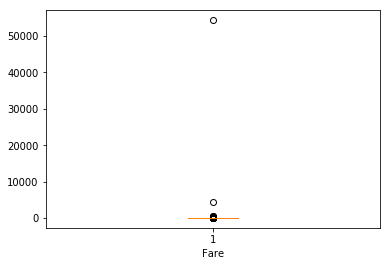

In [35]:
# #Plot boxplot to visualize Outliers
# %matplotlib inline  
plt.boxplot(df_cab_train['fare_amount'])
plt.xlabel('Fare')

In [36]:
#As we can see there is an outlier of value - 54343, 4343 on the fare. Also this is the max value of the fare.Removing the outlier of value - 54343

In [37]:
df_cab_train.sort_values(by='fare_amount', ascending=False)
#looking at the results we got to know that higghest cab fares were 54343 and 4343 which can not be possible for inter city travel
#hence dropping these two values

df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['fare_amount'] > 4342].index, axis=0)


In [38]:
df_cab_train['passenger_count'].describe()

count    15981.000000
mean         2.623553
std         60.901551
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [39]:
df_cab_train.shape

(15981, 13)

In [40]:
df_cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute
count,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000,15981.000000
mean,11.363445,-72.463886,39.915326,-72.463443,39.898415,2.623553,2011.728740,6.263438,15.671047,3.033790,13.498091,29.642075
std,10.796865,10.575215,6.830082,10.571876,6.187326,60.901551,1.863944,3.447668,8.683266,1.968681,6.520734,17.297635
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992139,40.734938,-73.991182,40.734662,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981689,40.752615,-73.980167,40.753562,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966815,40.767363,-73.963643,40.768011,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,453.000000,40.766125,401.083332,40.802437,41.366138,5345.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [41]:
df_cab_train.sort_values(by='passenger_count', ascending=False)
#looking at the results we got to know that passenger counts were pretty high in range of 35 to 5345, which cant be the case
#Considering a case were a taxi can have mx of 6 people, dropping the rest values
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['passenger_count']>6].index, axis=0)


In [42]:
Counter(df_cab_train['passenger_count']==0)

Counter({False: 15904, True: 58})

In [43]:
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['passenger_count']==0].index, axis=0)

In [44]:
#Working upon the latitude and longitudes
#As per wikipedia to try to get the domain knowledge, range of coordinates in real life situation are :
#Latitudes range from -90 to 90.
#Longitudes range from -180 to 180.
#Hence filtering the un realistic values

df_cab_train[df_cab_train['pickup_latitude']<-90]
df_cab_train[df_cab_train['pickup_latitude']>90]



,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,7,30,5,11,15


In [45]:
#Hence dropping one value of >90
df_cab_train = df_cab_train.drop((df_cab_train[df_cab_train['pickup_latitude']<-90]).index, axis=0)
df_cab_train = df_cab_train.drop((df_cab_train[df_cab_train['pickup_latitude']>90]).index, axis=0)


In [46]:
df_cab_train[df_cab_train['pickup_longitude']<-180]
df_cab_train[df_cab_train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute


In [47]:
df_cab_train[df_cab_train['dropoff_latitude']<-90]
df_cab_train[df_cab_train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute


In [48]:
df_cab_train[df_cab_train['dropoff_longitude']<-180]
df_cab_train[df_cab_train['dropoff_longitude']>180]



,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute


In [49]:
#https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula
#Calculating distance based on the coordinates given
#taken help of above website for implementing Haversine formula

In [50]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [df_cab_train,df_cab_test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['Distance_Travelled'] = d
    return d

In [51]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')


0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [52]:
df_cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,29.548416,3.435371
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,18.674818,3.972374
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,13.000000,1.298277
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,33.000000,2.217412
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,45.000000,4.045302
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,99.996040


In [53]:
df_cab_train.shape


(15903, 14)

In [54]:
df_cab_test.shape

(9914, 13)

Text(0.5, 0, 'Distance')

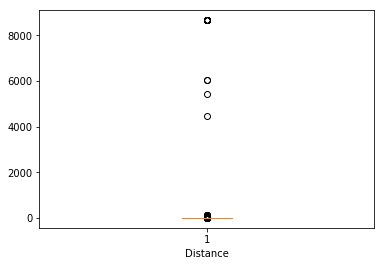

In [55]:
plt.boxplot(df_cab_train['Distance_Travelled'])
plt.xlabel('Distance')

#we can see few major outliers which can be dropped from the data set

In [56]:
df_cab_train['Distance_Travelled'].describe()

count    15903.000000
mean        15.070036
std        311.722613
min          0.000000
25%          1.215780
50%          2.125955
75%          3.851184
max       8667.542104
Name: Distance_Travelled, dtype: float64

In [57]:
df_cab_train.sort_values('Distance_Travelled', ascending=False)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled
9147,8.50,2014-07-14 21:37:29,0.000000,0.000000,-74.002037,40.752035,1,2014,7,14,0,21,37,8667.542104
8647,21.50,2014-03-27 18:01:00,-74.001808,40.750782,0.000000,0.000000,1,2014,3,27,3,18,1,8667.497512
2397,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,2012,6,24,6,17,11,8667.454421
472,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,2009,2,22,6,22,48,8667.304968
11653,16.00,2015-03-04 16:06:28,0.000000,0.000000,-73.985329,40.778534,1,2015,3,4,2,16,6,8666.701504
13340,18.50,2014-03-31 12:34:47,0.000000,0.000000,-73.997643,40.724432,1,2014,3,31,0,12,34,8666.613646
10215,13.30,2011-03-18 09:33:41,0.000000,0.000000,-73.990138,40.753392,1,2011,3,18,4,9,33,8666.584706
4597,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2010,3,30,1,7,12,8666.566030
10458,2.50,2013-02-23 20:58:00,-73.979678,40.765962,0.000000,0.000000,1,2013,2,23,5,20,58,8665.976222
10672,18.00,2015-04-30 15:34:46,-73.979355,40.753902,0.000000,0.000000,1,2015,4,30,3,15,34,8665.702390


In [58]:
#after refining the data set given we can see that there are still some records for which fare amount and num of passengers is 0
#Hence considering a business scenario that these scenes are not possible, dropping these values

df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['passenger_count']==0].index, axis=0)
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['fare_amount']==0.0].index, axis=0)

In [59]:
df_cab_train.shape

(15902, 14)

In [60]:
#Visualizations


Text(0, 0.5, 'Frequency')

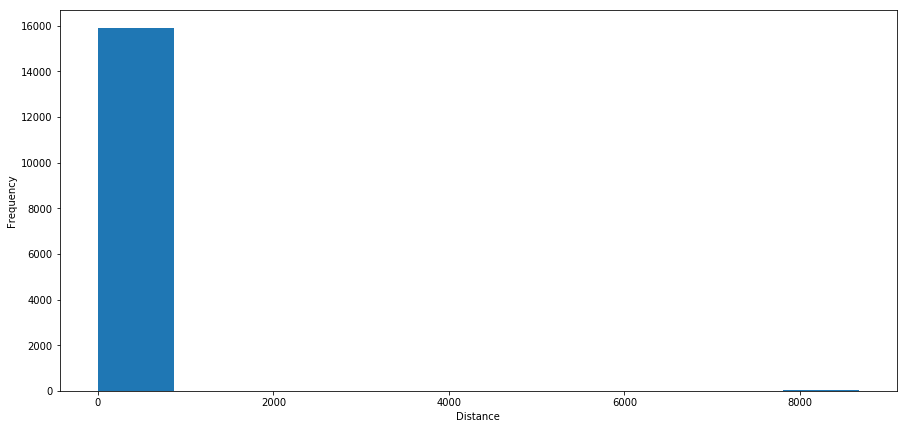

In [61]:
plt.figure(figsize=(15,7))
plt.hist(df_cab_train['Distance_Travelled'], bins=10)
plt.xlabel('Distance')
plt.ylabel('Frequency')

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

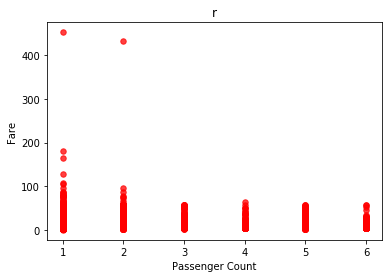

In [65]:
scatterplot(df_cab_train['passenger_count'],df_cab_train['fare_amount'],"Passenger Count","Fare","r")
#we observe that single passengers are most frequent travellers and also have paid the highest fare

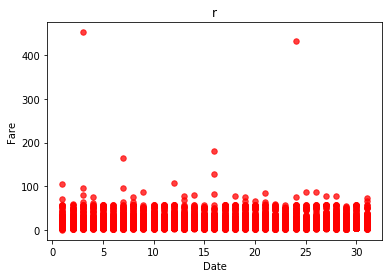

In [66]:
scatterplot(df_cab_train['Date'],df_cab_train['fare_amount'],"Date","Fare","r")

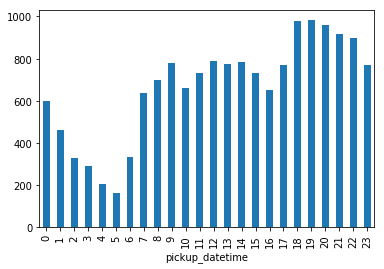

In [67]:
df_cab_train.groupby([ df_cab_train["pickup_datetime"].dt.hour])['pickup_datetime'].count().plot(kind="bar")
#Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

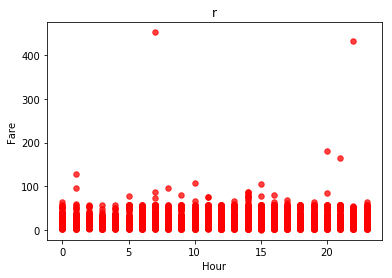

In [68]:
scatterplot(df_cab_train['Hour'],df_cab_train['fare_amount'],"Hour","Fare","r")
#We can observe that the cabs taken at 7 am and 23 Pm are the costliest. 
#Hence we can assume that cabs taken early in morning and late at night are costliest

Text(0, 0.5, 'Frequency')

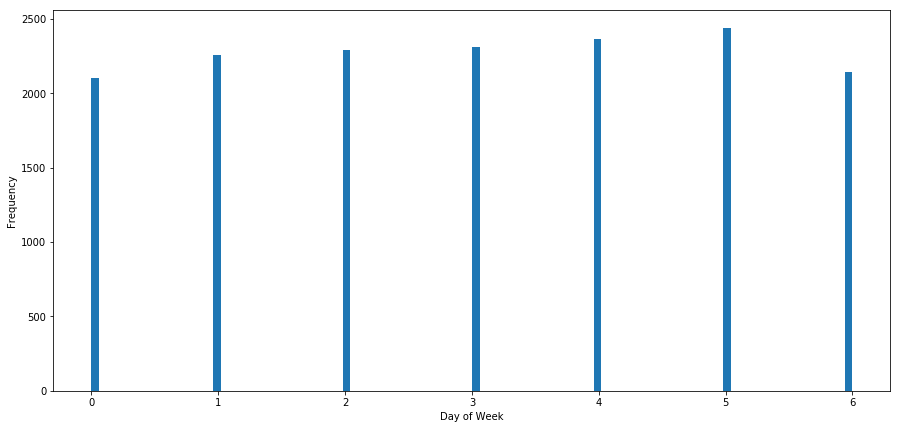

In [69]:
#Effect of day of week
plt.figure(figsize=(15,7))
plt.hist(df_cab_train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
#Not much difference is made becuase of day of week

In [70]:
#making some analysis over distance and fare
df_cab_train[df_cab_train['Distance_Travelled']==0]
#We have arrived at 2 cases for distance travelled as 0
#Case1 - Pickup and drop locations are same- May be the cab was cancelled after arrival. Hence the situatio
#Case2- The pickup and drop locations are (0.00,0.00) coordinates which upon googling came out to be location present in middle of ocean


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled
11,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3,2012,12,24,0,11,24,0.0
15,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1,2013,11,23,5,12,57,0.0
105,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1,2009,3,25,2,0,8,0.0
124,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2,2013,1,17,3,17,22,0.0
191,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1,2014,1,8,2,21,55,0.0
192,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5,2010,9,5,6,17,8,0.0
270,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1,2012,8,25,5,1,53,0.0
273,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4,2009,10,30,4,18,13,0.0
290,6.90,2009-12-14 12:33:00,-73.982432,40.745747,-73.982432,40.745747,1,2009,12,14,0,12,33,0.0
357,8.50,2013-07-04 16:41:27,0.000000,0.000000,0.000000,0.000000,1,2013,7,4,3,16,41,0.0


In [75]:
df_cab_train.shape

(15569, 14)

In [72]:
#removing values where Location as 0,0 latitude longitude
df_cab_train = df_cab_train.drop(df_cab_train[(df_cab_train['pickup_longitude']==0.000000) | (df_cab_train['pickup_longitude']==0.000000)].index, axis=0)    
#removing values where Location as 0,0 latitude longitude
df_cab_train = df_cab_train.drop(df_cab_train[(df_cab_train['dropoff_longitude']==0.000000) | (df_cab_train['dropoff_longitude']==0.000000)].index, axis=0)    


In [76]:
#Considering a base cancellation fee of amount 20, modifying the fare_amount for the cases of same pickup and drop points
df_cab_train.loc[df_cab_train['Distance_Travelled'] == 0, 'fare_amount'] = 20

In [77]:
df_cab_train.sort_values('Distance_Travelled', ascending=False)
#dropping the outliers of distance travelled mentioned along with the boxplot- 5420.988959, 4447.086698

df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['Distance_Travelled']> 50].index, axis=0)  


In [78]:
col_list=list(df_cab_train.columns.values)
print(col_list)

['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour', 'Minute', 'Distance_Travelled']


In [79]:
#Correlation analysis
df_corr = df_cab_train.loc[:,col_list]

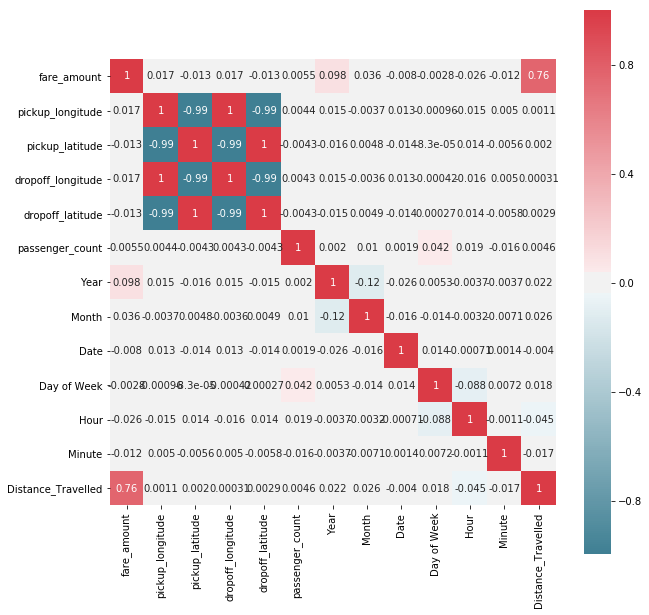

In [80]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

In [82]:
#Nomalisation
for i in col_list:
   if i !='pickup_datetime':
       df_cab_train[i] = (df_cab_train[i] - df_cab_train[i].min())/(df_cab_train[i].max() - df_cab_train[i].min())

In [83]:
#DECISION TREE
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
#sklearn.cross_validation package is depreacted now hence using model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [84]:
df_cab_test['Predicted_fare'] = 0

In [85]:
df_cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled,Predicted_fare
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259,0
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353,0
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628,0
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033,0
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301,0


In [86]:
#dropping pickup datetime as we have already extracted the relative fields from it
df_train = df_cab_train.drop(['pickup_datetime'], axis = 1)
df_test=df_cab_test.drop(['pickup_datetime'], axis=1)

In [88]:
#Divide data into train and test
train, test = train_test_split(df_train, test_size=0.2)

In [89]:
#Building DT model
Model_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data obtained from train data
predictions_DT = Model_DT.predict(test.iloc[:,1:])

In [90]:
# Calculating RMSE and Rsquare for test data to check accuracy for DT
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,0],predictions_DT))
rsquare_for_test=r2_score(test.iloc[:,0],predictions_DT)
print("RMSE for DT " + str(rmse_for_test))
print("R-Square for DT "+str(rsquare_for_test))

RMSE for DT 0.011668971661228942
R-Square for DT 0.6931500145566145


In [91]:
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled,Predicted_fare
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259,0
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353,0
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628,0
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033,0
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301,0


In [92]:
#RANDOM FORREST

# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Building Random forest model
Model_RF = RandomForestRegressor(n_estimators = 20).fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data
predictions_RF = Model_RF.predict(test.iloc[:,1:])

In [93]:
# Calculating RMSE for test data to check accuracy for RF
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,0],predictions_RF))
rsquare_for_test=r2_score(test.iloc[:,0],predictions_RF)
print("RMSE for RF " + str(rmse_for_test))
print("R-Square for RF "+str(rsquare_for_test))

RMSE for RF 0.01213402203821154
R-Square for RF 0.6682044969839842


In [94]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Building Random forest model
Model_LR = LinearRegression().fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data
predictions_LR = Model_LR.predict(test.iloc[:,1:])

In [95]:
# Calculating RMSE for test data to check accuracy for LT
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,0],predictions_LR))
rsquare_for_test=r2_score(test.iloc[:,0],predictions_LR)
print("RMSE for LR " + str(rmse_for_test))
print("R-Square for LR "+str(rsquare_for_test))

RMSE for LR 0.010903823903314923
R-Square for LR 0.7320716961104352


In [367]:
#import xgboost
#Regression_xgbooost =xgboost.XGBRegressor(n_estimators=201,max_depth=17)
#Regression_xgbooost.fit(train.iloc[:,1:], train.iloc[:,0])
#predictions_XG=Regression_xgbooost.predict(test.iloc[:,1:])

In [115]:
#RANDOM FORREST

# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Building Random forest model
Model_RF = RandomForestRegressor(n_estimators = 20).fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data
predictions_RF = Model_RF.predict(test.iloc[:,1:])

In [116]:
# Calculating RMSE for test data to check accuracy for RF
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,0],predictions_RF))
rsquare_for_test=r2_score(test.iloc[:,0],predictions_RF)
print("RMSE for RF " + str(rmse_for_test))
print("R-Square for RF "+str(rsquare_for_test))

RMSE for RF 4.560492124297943
R-Square for RF 0.7398128114442588


In [123]:
df_test.isnull().sum().sort_values(ascending=False)


Predicted_fare        0
Distance_Travelled    0
Minute                0
Hour                  0
Day of Week           0
Date                  0
Month                 0
Year                  0
passenger_count       0
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
dtype: int64

In [133]:
df_test.iloc[:,11]

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [138]:
#Applying model to our test data by using Linear Regression Model

#Building Random forest model
#Model_LR = LinearRegression().fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data
df_test['Predicted_fare'] = Model_LR.predict(df_test.iloc[:,0:12])



In [140]:
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled,Predicted_fare
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259,10.744138
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353,10.574563
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628,5.296645
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033,9.121069
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301,17.091100
